# Spam classification with Naive Bayes and Support Vector Machines.

- Libraries
- Exploring the Dataset
- Distribution spam and non-spam plots
- Feature Engineering
- Predictive analysis (Multinomial Naive Bayes and Support Vector Machines)
- Conclusion

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

### Exploring Dataset

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Distribution spam/non-spam plots 

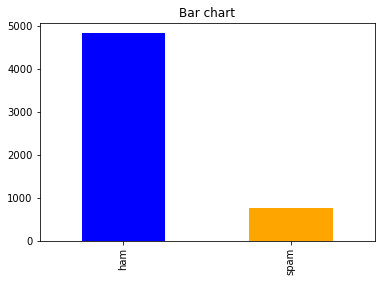

In [6]:
count=pd.value_counts(df["v1"], sort= True)
count.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

### Feature engineering

In [7]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["v2"])
np.shape(X)

(5572, 8404)

### Predictive Analysis

In [8]:
df["v1"]=df["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


### Multinomial naive bayes classifier

In [10]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

0.995981784087865
0.9760739532354541


In [11]:
#Evaluate
predicted_result=clf.predict(X_test)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
training_labels=['spam','ham']
training_labels=le.fit_transform(training_labels)
target=le.inverse_transform(predicted_result)
print(target)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']


In [12]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,predicted_result))
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted_result)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1587
           1       0.91      0.92      0.91       252

    accuracy                           0.98      1839
   macro avg       0.95      0.95      0.95      1839
weighted avg       0.98      0.98      0.98      1839

[[1563   24]
 [  20  232]]


[[84.991844   1.305057 ]
 [ 1.0875475 12.615553 ]]


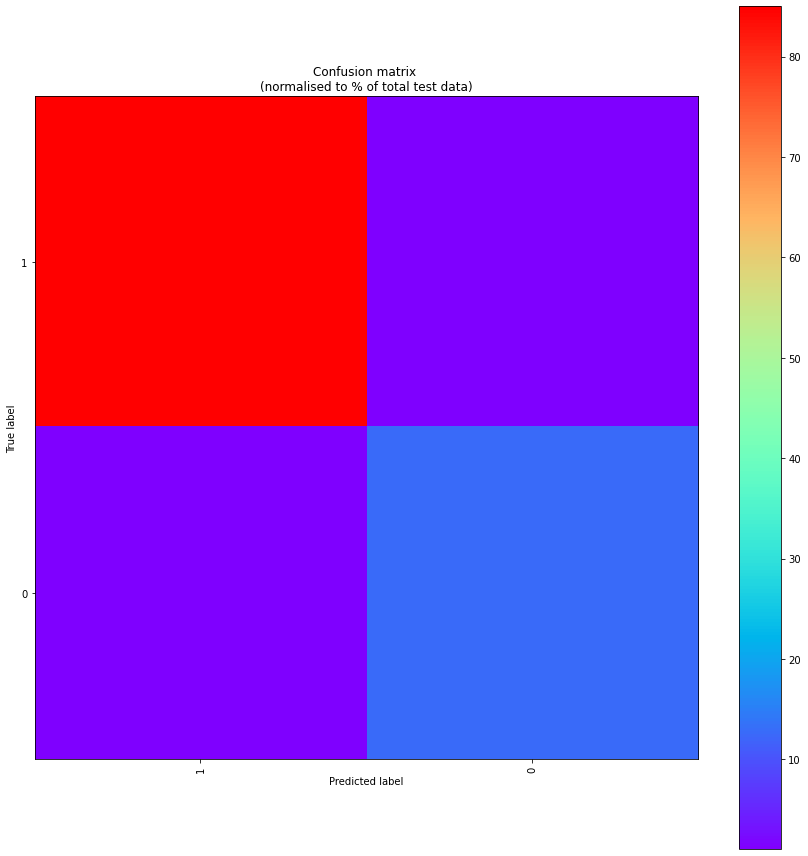

In [13]:
#Plot Result 
from numpy import float32,int32
width = 12
height = 12
normalised_confusion_matrix = np.array(confusion_matrix, dtype=float32)/np.sum(confusion_matrix)*100
print(normalised_confusion_matrix)
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks,training_labels,rotation=90)
plt.yticks(tick_marks,training_labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Support vector machine

In [14]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

1.0
0.9820554649265906


In [15]:
#Evaluate
predicted_result=clf.predict(X_test)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
training_labels=['spam','ham']
training_labels=le.fit_transform(training_labels)
target=le.inverse_transform(predicted_result)
print(target)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


In [16]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,predicted_result))
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted_result)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.87      0.93       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839

[[1587    0]
 [  33  219]]


[[86.2969     0.       ]
 [ 1.7944535 11.908646 ]]


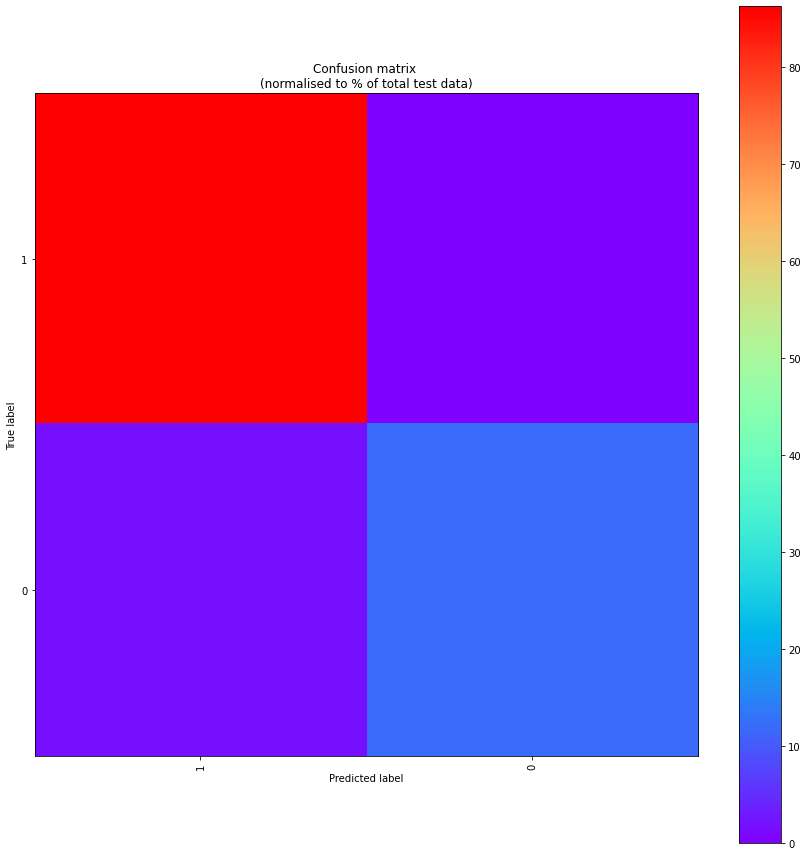

In [17]:
#Plot Result 
from numpy import float32,int32
width = 12
height = 12
normalised_confusion_matrix = np.array(confusion_matrix, dtype=float32)/np.sum(confusion_matrix)*100
print(normalised_confusion_matrix)
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks,training_labels,rotation=90)
plt.yticks(tick_marks,training_labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Conclusion
- The best model I have found is support vector machine with 98% accuracy.
- It classifies every non-spam message correctly (Model precision)
- It classifies the 87% of spam messages correctly (Model recall)